In [1]:
import pandas as pd

In [2]:
# Import DataSet
data_set1 = pd.read_csv('Data_Set.csv')

In [3]:
# Set a Header
data_set2 = pd.read_csv('Data_Set.csv', header=2)

In [4]:
# Rename a Column
data_set3 = data_set2.rename(columns={'Temperature':'Temp'})

In [5]:
# Remove a Column
data_set4 = data_set3.drop('No. Occupants', axis=1)

In [6]:
data_set3.drop('No. Occupants', axis=1, inplace=True)

In [7]:
# Remove a Row
data_set5 = data_set4.drop(2, axis=0)

In [8]:
# Reset the Index
data_set6 = data_set5.reset_index(drop=True)

In [9]:
# Describe a dataset
data_set6.describe()

,Time,E_Plug,E_Heat,Temp
count,24.000000,23.000000,24.000000,24.000000
mean,12.500000,31.521739,25.666667,-10.250000
std,7.071068,21.336843,9.262672,7.968689
min,1.000000,16.000000,-4.000000,-22.000000
25%,6.750000,20.500000,19.750000,-16.250000
50%,12.500000,27.000000,28.500000,-13.000000
75%,18.250000,34.500000,32.000000,-3.000000
max,24.000000,120.000000,36.000000,3.000000


In [10]:
# Minimun Number
min_item = data_set6['E_Heat'].min()
# Locate Min Number
data_set6['E_Heat'][data_set6['E_Heat'] == min_item]

16   -4
Name: E_Heat, dtype: int64

In [11]:
#  Replace a Cell
data_set6['E_Heat'].replace(-4, 21, inplace=True)

In [12]:
# Covariance
data_set6.cov()

,Time,E_Plug,E_Heat,Temp
Time,50.000000,88.535573,-0.500000,8.217391
E_Plug,88.535573,455.260870,25.833992,0.154150
E_Heat,-0.500000,25.833992,47.346014,-51.206522
Temp,8.217391,0.154150,-51.206522,63.500000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sn

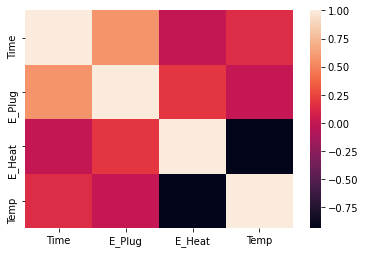

In [14]:
sn.heatmap(data_set6.corr())
plt.show()

In [15]:
# Missing Values
data_set6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [16]:
import numpy as np
data_set7 = data_set6.replace('!', np.NaN)

In [17]:
data_set7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [18]:
data_set7 = data_set7.apply(pd.to_numeric)

In [19]:
data_set7.isnull()

,Time,E_Plug,E_Heat,Price,Temp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [20]:
# Drop one row
data_set7.drop(13, axis=0, inplace=True)

In [21]:
# Drop all rows which contains NaN
data_set7.dropna(axis=0, inplace=True)

In [22]:
# Replace NaN with the last cell's value
data_set8 = data_set7.fillna(method='ffill')
# Replace NaN with the later cell's value
data_set8 = data_set7.fillna(method='bfill')

In [23]:
# Replace NaN with Mean of the Column
from sklearn.impute import SimpleImputer
m_var = SimpleImputer(missing_values=np.nan, strategy='mean')
m_var.fit(data_set7)
data_set9 = m_var.transform(data_set7)

<AxesSubplot:>

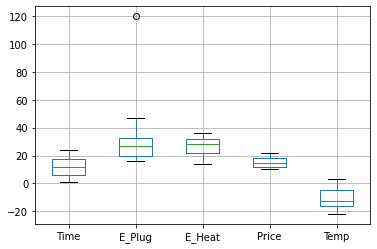

In [24]:
# Outlier Detection
data_set8.boxplot()

In [25]:
data_set8['E_Plug'].quantile(0.25)
data_set8['E_Plug'].quantile(0.75)

32.25

In [26]:
# Q1 = 21.25
# Q2 = 33.75
# IQR = 33.75 - 21.25 = 12.5

# Mild Outlier
#Lower Bound = Q1 - 1.5*IQR = 21.25 - 1.5*12.5 = 2.5
#Upper Bound = Q3 + 1.5*IQR = 33.75 + 1.5*12.5 = 52.5

# Extreme Outlier
#Lower Bound = Q1 - 3*IQR = 21.25 - 3*12.5 = -16.25
#Upper Bound = Q3 + 3*IQR = 33.75 + 3*12.5 = 71.25

data_set8['E_Plug'].replace(120, 42, inplace=True)

In [27]:
# Concatenation
new_col = pd.read_csv('Data_New.csv')

# Concate by column side
data_set10 = pd.concat([data_set8, new_col], axis=1)

In [28]:
# Dummy Variables
data_set10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     22 non-null     float64
 1   E_Plug   22 non-null     float64
 2   E_Heat   22 non-null     float64
 3   Price    22 non-null     float64
 4   Temp     22 non-null     float64
 5   P/OffP   24 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.3+ KB


In [29]:
data_set11 = pd.get_dummies(data_set10)
data_set11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             22 non-null     float64
 1   E_Plug           22 non-null     float64
 2   E_Heat           22 non-null     float64
 3   Price            22 non-null     float64
 4   Temp             22 non-null     float64
 5   P/OffP _OffPeak  24 non-null     uint8  
 6   P/OffP _Peak     24 non-null     uint8  
dtypes: float64(5), uint8(2)
memory usage: 1.2 KB


In [30]:
# Normalization
from sklearn.preprocessing import minmax_scale, normalize  

In [32]:
# First Method: Min Max Scale

data_set12 = minmax_scale(data_set11, feature_range=(0,1))
print(data_set12)

[[0.         0.25806452 0.63636364 0.         0.28       1.
  0.        ]
 [0.04347826 0.03225806 0.81818182 0.16666667 0.2        1.
  0.        ]
 [0.08695652 0.         0.90909091 0.08333333 0.12       1.
  0.        ]
 [0.13043478 0.         0.86363636 0.16666667 0.16       1.
  0.        ]
 [0.17391304 0.         0.72727273 0.         0.32       1.
  0.        ]
 [0.2173913  0.         0.77272727 0.         0.24       1.
  0.        ]
 [0.26086957 0.09677419 0.63636364 0.33333333 0.32       0.
  1.        ]
 [0.30434783 0.19354839 0.68181818 0.16666667 0.28       0.
  1.        ]
 [0.34782609 0.29032258 0.54545455 0.16666667 0.4        0.
  1.        ]
 [0.39130435 0.32258065 0.45454545 0.33333333 0.56       1.
  0.        ]
 [0.43478261 0.35483871 0.27272727 0.33333333 0.72       1.
  0.        ]
 [0.47826087 0.4516129  0.22727273 0.5        0.88       1.
  0.        ]
 [0.52173913 0.4516129  0.22727273 0.5        0.88       1.
  0.        ]
 [       nan        nan        nan    

In [34]:
data_set13 = normalize(data_set11, norm='l2', axis=0)
# axis = 0  for normalizing features / axis = 1 for normalizing each sample

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [35]:
# Final Processed DataSet
data_set14 = pd.DataFrame(data_set13, columns=['Time','E_Plug','E_Heat','Price','Temp','OffPeak','Peak'])

NameError: name 'data_set13' is not defined